# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


## Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






## Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

In [247]:
import sklearn
print(sklearn.__version__)

1.1.3


In [248]:
#pip install itables
#conda list scikit-learn
#pip install --upgrade scikit-learn
#conda install scikit-learn=1.1.3
#!pip install -U scikit-learn
#!conda update conda 


## 1. Import Modules, Load Data and Data Review

In [249]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [250]:
df = pd.read_csv("final_scout_not_dummy2.csv")

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [251]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,"Alloy wheels, Voice Control",7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [253]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000
mean,18020.242,32092.437,5.937,1.390,1.043,88.494,0.247,1428.657,1337.675,4.824,117.783
std,7377.201,36982.839,0.705,1.121,0.339,26.672,0.431,275.852,199.672,0.888,18.023
min,4950.000,0.000,5.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000,45.000
25%,12850.000,1913.000,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.000,104.000
50%,16900.000,20410.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800,117.000
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400,129.000
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100,253.000


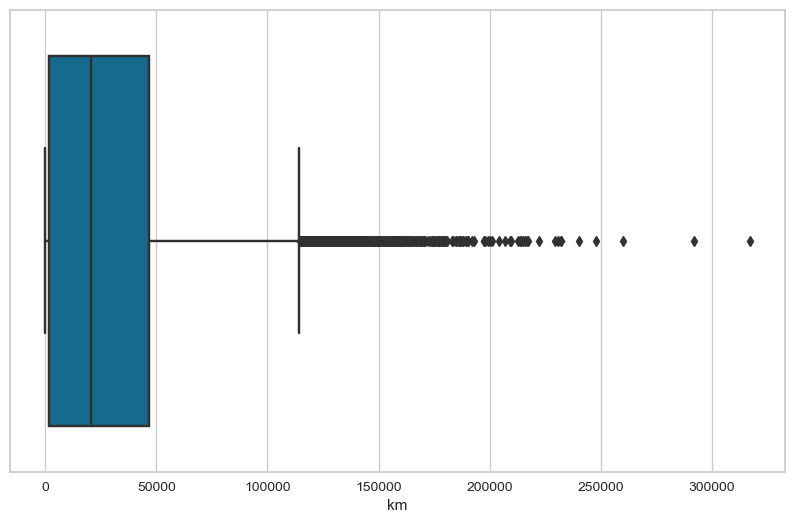

In [254]:
sns.boxplot(df["km"]); #we expected this for "km" column.

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

In [255]:
df_object = df.select_dtypes(include ="object").head()
df_object

,make_model,body_type,Type,Fuel,Extras,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Voice Control",Metallic,Cloth,Automatic,front,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package


In [256]:
for col in df.select_dtypes(include ="object"):
    print(f"{col:<28}:", df[col].nunique())


make_model                  : 8
body_type                   : 8
Type                        : 5
Fuel                        : 3
Extras                      : 659
Paint_Type                  : 3
Upholstery_type             : 2
Gearing_Type                : 3
Drive_chain                 : 3
Comfort_Convenience_Package : 3
Entertainment_Media_Package : 2
Safety_Security_Package     : 3


In [257]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

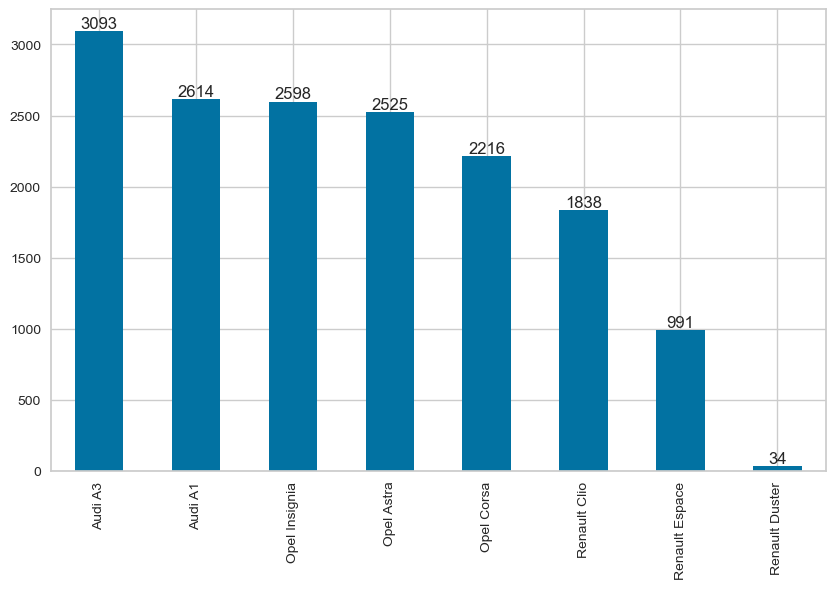

In [258]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

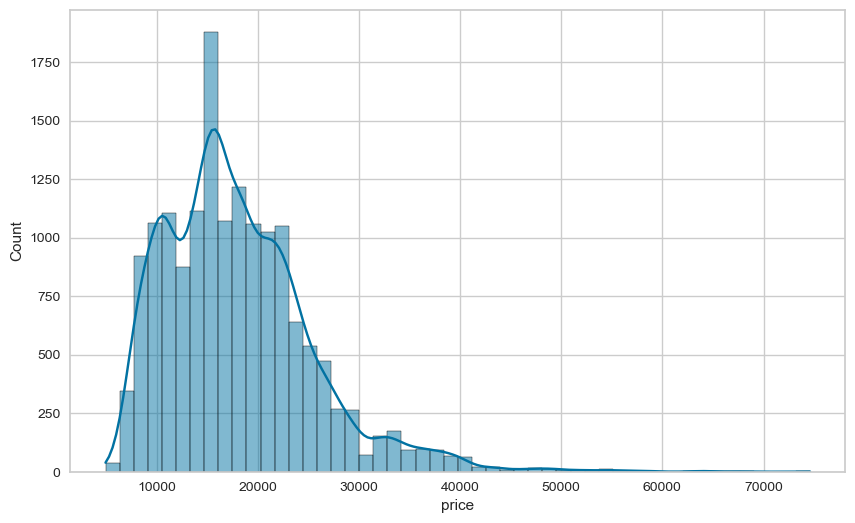

In [259]:
sns.histplot(df.price, bins=50, kde=True);

In [260]:
skew(df.price) #positive skew

1.2368977644607202

In [261]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,99.000
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,129.000
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,99.000
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,99.000
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,109.000
...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,139.000
15905,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400,168.000
15906,39875,15.000,6.000,0.000,1.000,146.000,1,1997.000,1734.000,5.300,139.000
15907,39700,10.000,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,139.000


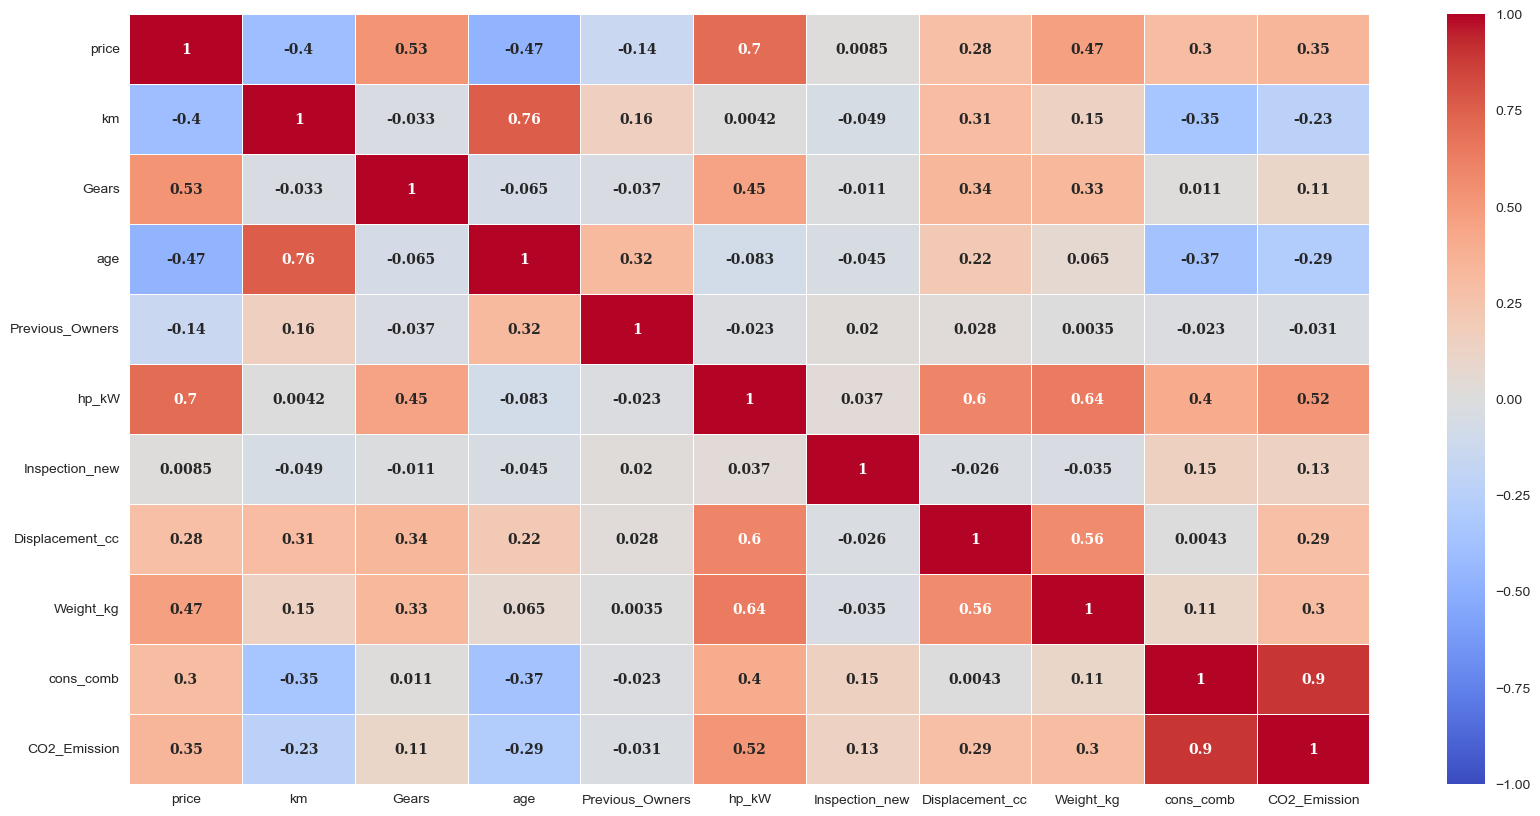

In [262]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap='coolwarm',linewidth=.5,
            annot_kws= {
                        'fontsize': 10,
                        'fontweight': 'bold',
                        'fontfamily': 'serif'
                        });
#we examine between corelation of two features.

### Converting the Extras feature from object to numeric

In [263]:
df["Extras"].sample(10)

8031                                          Alloy wheels
5447                                          Alloy wheels
13859      Alloy wheels, Catalytic Converter, Touch screen
9141                                          Alloy wheels
3765           Alloy wheels, Sport seats, Sport suspension
4606                                          Alloy wheels
13447                Alloy wheels, Roof rack, Touch screen
11654             Alloy wheels, Sport seats, Voice Control
7788     Alloy wheels, Catalytic Converter, Roof rack, ...
7384                                             Roof rack
Name: Extras, dtype: object

In [264]:
df.Extras.nunique()

659

In [265]:
df["Extras"] = df["Extras"].apply(lambda x: x.count(",")).add(1)
df["Extras"]

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [266]:
df1 = df.copy()

## multicollinearity control

If there is a strong correlation between the independent variables, this situation is called multicolineraty.

Multicolineraty prevents my model from detecting important features.

In [267]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [268]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

<AxesSubplot:xlabel='price'>

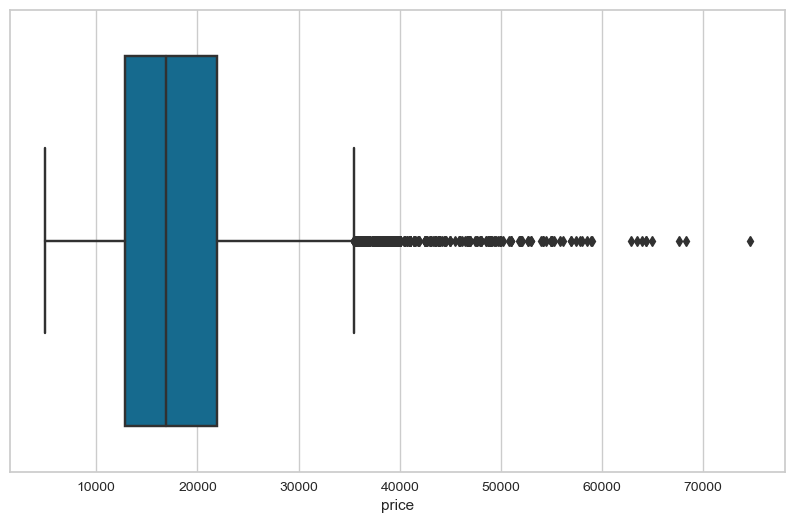

In [269]:
sns.boxplot(df.price)

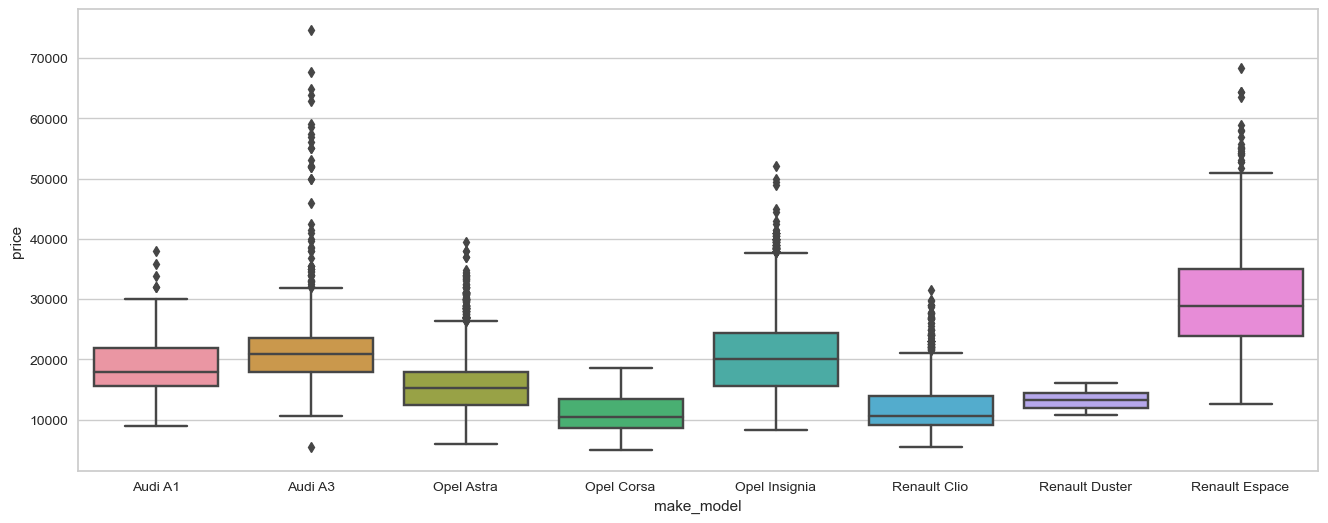

In [270]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [271]:
df.shape

(15909, 23)

### Train | Test Split

In [272]:
X = df.drop(columns = "price")
y = df.price

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =101)

In [275]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12727, 22)
Train target shape   :  (12727,)
Test features shape  :  (3182, 22)
Test target shape    :  (3182,)


## OneHotEncoder

### Example

In [276]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False) #.set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally, 
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive, 
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used. 
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies featurs is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.


## OrdinalEncoder

In [277]:
df.sample(10)

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
9058,Opel Corsa,Sedans,7770,29400.000,Used,Benzine,1,5.000,3.000,1.000,51.000,0,Metallic,Cloth,Manual,1229.000,1178.000,front,5.400,126.000,Standard,Standard,Safety Premium Package
4757,Audi A3,Sedans,21500,28913.000,Used,Diesel,2,6.000,1.000,1.000,85.000,0,Metallic,Part/Full Leather,Manual,1598.000,1815.000,front,4.000,107.000,Standard,Standard,Safety Premium Plus Package
13108,Renault Clio,Sedans,15780,16700.000,Used,Benzine,3,6.000,1.000,1.000,87.000,0,Metallic,Part/Full Leather,Automatic,1197.000,1165.000,front,5.400,120.000,Standard,Plus,Safety Premium Package
13515,Renault Clio,Transporter,8190,44023.000,Used,Diesel,1,5.000,3.000,1.000,56.000,0,Uni/basic,Cloth,Manual,1461.000,1209.000,front,3.300,85.000,Standard,Standard,Safety Premium Package
12432,Opel Insignia,Sedans,37990,8700.000,Demonstration,Diesel,5,6.000,0.000,1.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1673.000,front,5.100,134.000,Standard,Plus,Safety Premium Package
1230,Audi A1,Compact,15850,17768.000,Used,Benzine,3,5.000,2.000,2.000,92.000,0,Metallic,Cloth,Manual,1395.000,1180.000,front,5.100,120.000,Standard,Plus,Safety Premium Package
7143,Opel Astra,Sedans,18450,20800.000,Used,Benzine,2,6.000,1.000,1.000,110.000,1,Metallic,Cloth,Automatic,1399.000,1308.000,front,5.700,130.000,Standard,Plus,Safety Premium Package
2009,Audi A1,Sedans,27200,100.000,Pre-registered,Benzine,1,7.000,0.000,1.000,85.000,0,Metallic,Cloth,Automatic,999.000,1135.000,front,4.800,108.000,Standard,Plus,Safety Premium Package
3799,Audi A3,Sedans,21888,29360.000,Used,Diesel,1,7.000,2.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1360.000,front,3.900,103.000,Standard,Plus,Safety Premium Package
3119,Audi A3,Sedans,15000,70000.000,Used,Diesel,1,6.000,3.000,2.000,81.000,0,Metallic,Cloth,Manual,1598.000,1335.000,front,3.800,99.000,Standard,Plus,Safety Premium Package


## OneHotEncoder  and OrdinalEncoder for X_train

### OneHotEncoder

- Convert nominal categoric features

In [278]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [279]:
cat = X_train.select_dtypes("object").columns
cat

# şimdi aynı işlemleri kendi datamıza uygulamak için fit işlemini uygulayacağımız train datasındaki kategorik featurları
# tespit ediyoruz.

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain',
       'Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'],
      dtype='object')

In [280]:

cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type','Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']


In [281]:
X_train[cat_onehot].head()

,make_model,body_type,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
15488,Renault Espace,Van,Used,Benzine,Metallic,Part/Full Leather,Automatic,front
13676,Renault Clio,Sedans,Used,Diesel,Metallic,Cloth,Manual,front
9325,Opel Corsa,Sedans,Employee's car,Benzine,Metallic,Cloth,Automatic,front
9968,Opel Corsa,Compact,New,Benzine,Metallic,Cloth,Automatic,front
7701,Opel Astra,Sedans,Used,Benzine,Metallic,Cloth,Automatic,front


In [282]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit_transform(X_train[cat_onehot])

# bu kod ile train setinin kategorik featurlarına onehotencoder dönüşümü uyguluyoruz.

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [283]:
enc.get_feature_names_out(cat_onehot)

# bu kod ile onehotencoder dönüşümü sonrası elde ettiğimiz yeni feature isimleri görüyoruz.

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'Type_Demonstration', "Type_Employee's car",
       'Type_New', 'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine',
       'Fuel_Diesel', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [284]:
X_train_onehot = pd.DataFrame(enc.fit_transform(X_train[cat_onehot]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat_onehot))
X_train_onehot

# kategorik featurların onehotencoder dönüşümü sonrası datamızı yeni feature isimleri ile görmek için dönüşüm sonrası 
# arraye dönüşmüş olan datamızı df'e dönüştürüp columns isimlerine enc.get_feature_names_out(cat_onehot)kodu ile elde ettiğimiz 
# isimleri atıyoruz. arraye dönüşmüş olan datamızı tekrar df'e dönüştürdüğümüzde index numaraları 0'dan başlayacağı için 
# index parametresine X_train.index kodu ile X_trainin mevcut indexini atıyoruz ki ileride dönüşüm yaptığımız kategorik 
# featurlar ile numeric featurları birbirleriyle join edebilelim.


,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
15488,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
13676,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
9325,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
9968,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
7701,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


### OrdinalEncoder
- Convert ordinal categoric features

In [285]:
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']

# ordinalencoder uygulayacağımız featurların listesi

In [286]:
for i in cat_ordinal:
    print(f"{i:<27}:", df[i].unique())

# bu featurların unique gözlemlerini tespit ediyoruz. 

Comfort_Convenience_Package: ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package: ['Plus' 'Standard']
Safety_Security_Package    : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [287]:
from sklearn.preprocessing import OrdinalEncoder

cat_for_comfort = ['Standard', 'Premium', 'Premium Plus'] #Comfort_Convenience_Package
cat_for_ent = ['Standard', 'Plus']  #Entertainment_Media_Package
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package'] #Safety_Security_Package

enc2 = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

# ordinalencoder algoritmasının yapacağı dönüşüm sıralamasını manuel olarak algoritmaya kendimiz veriyoruz.

# ordinalencoder içine verdiğimiz categories listesinin sıralaması aşağıda ordinal encoder dönüşümü uygulayacağımız featurların
# sıralamasıyla aynı olmalı.

In [288]:
X_train[cat_ordinal]

# train datasından ordinalencoder uygulanacak featurları çekiyoruz.

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Standard,Plus,Safety Premium Package
13676,Standard,Plus,Safety Premium Plus Package
9325,Premium,Plus,Safety Premium Package
9968,Premium,Plus,Safety Premium Package
7701,Standard,Plus,Safety Premium Package
...,...,...,...
5695,Premium,Plus,Safety Premium Package
8006,Standard,Standard,Safety Premium Package
1361,Standard,Standard,Safety Premium Plus Package
1547,Standard,Plus,Safety Premium Package


In [289]:
enc2.fit_transform(X_train[cat_ordinal])

# numaralnadırmanın bizim yukarıda verdiğimiz sırlamaya göre yapıldığını görüyoruz.

array([[0., 1., 1.],
       [0., 1., 2.],
       [1., 1., 1.],
       ...,
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [290]:
enc2.get_feature_names_out(cat_ordinal)

# feature isimlerini çekiyoruz. gördüğünüz gibi isimler aynı

array(['Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'], dtype=object)

In [291]:
X_train_ordinal = pd.DataFrame(enc2.fit_transform(X_train[cat_ordinal]), index = X_train.index, 
                           columns = enc2.get_feature_names_out(cat_ordinal))

X_train_ordinal

# df'e dönüştürüyoruz.

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,0.000,1.000,1.000
13676,0.000,1.000,2.000
9325,1.000,1.000,1.000
9968,1.000,1.000,1.000
7701,0.000,1.000,1.000
...,...,...,...
5695,1.000,1.000,1.000
8006,0.000,0.000,1.000
1361,0.000,0.000,2.000
1547,0.000,1.000,1.000


## OneHotEncoder  and OrdinalEncoder for X_test

### OneHotEncoder

In [292]:
X_test_onehot = pd.DataFrame(enc.transform(X_test[cat_onehot]), index = X_test.index, 
                             columns = enc.get_feature_names_out(cat_onehot))
X_test_onehot

# Train datasına uyguladığımız işlemlerin aynısını test datasına da uyguluyoruz. Burda dikkat etmeniz gereken husus
# test setine sadece transform işlemi uygulanıyor olmasıdır. Yani test setine yapılan dönüşüm train setindeki unique 
# kategorik gözlemlere göre yapılıyor. OneHotEncoder(handle_unknown="ignore", sparse=False)  algoritmasında
# handle_unknown parametresine "ignore" atandığından test setinde olup train setinde olmayan kategorik gözlemler
# gözardı edilerek bu gözlemlere 0 atanacağını unutmayalım.

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
227,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
7843,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
13774,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
11996,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
5785,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000
7794,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
11608,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
11081,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000


### OrdinalEncoder

In [293]:
X_test_ordinal = pd.DataFrame(enc2.transform(X_test[cat_ordinal]), index = X_test.index, 
                           columns = enc2.get_feature_names_out(cat_ordinal))

X_test_ordinal

# Train datasına yapılan dönüşümün aynısı yapılacak. ordinal encoder test setinde olup train datasında olmayan bir kategorik 
# gözlem olursa hata döndürür.

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,1.000,0.000,1.000
7843,0.000,1.000,1.000
13774,0.000,0.000,1.000
11996,1.000,1.000,1.000
5785,0.000,1.000,1.000
...,...,...,...
4940,1.000,1.000,1.000
7794,0.000,1.000,1.000
11608,1.000,1.000,1.000
11081,0.000,0.000,1.000


### Joining All Features of X_test

In [294]:
X_test_numeric = X_test.select_dtypes("number")
X_test_numeric.head()

# X_test'in numeric featurlarını çekiyoruz.

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
227,36625.000,3,7.000,3.000,1.000,85.000,0,1598.000,1180.000,4.000,106.000
7843,7000.000,1,6.000,0.000,1.000,110.000,1,1399.000,1425.000,5.500,127.000
13774,59073.000,1,5.000,3.000,1.000,55.000,0,1461.000,1071.000,3.600,85.000
11996,21000.000,5,6.000,1.000,1.000,121.000,1,1490.000,1503.000,6.100,138.000
5785,75700.000,6,6.000,3.000,2.000,100.000,1,1598.000,1425.000,4.500,119.000


In [295]:
X_test_new = X_test_numeric.join([X_test_onehot, X_test_ordinal])
X_test_new

# kategorik featurlar ile numaric featurları train datasında olduğu gibi join fonsiyonu ile yan yana birleştiriyoruz.

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,36625.000,3,7.000,3.000,1.000,85.000,0,1598.000,1180.000,4.000,106.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000
7843,7000.000,1,6.000,0.000,1.000,110.000,1,1399.000,1425.000,5.500,127.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
13774,59073.000,1,5.000,3.000,1.000,55.000,0,1461.000,1071.000,3.600,85.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
11996,21000.000,5,6.000,1.000,1.000,121.000,1,1490.000,1503.000,6.100,138.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000
5785,75700.000,6,6.000,3.000,2.000,100.000,1,1598.000,1425.000,4.500,119.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,8500.000,4,6.000,1.000,1.000,85.000,0,999.000,1360.000,4.700,107.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000
7794,1647.363,3,6.000,0.000,1.000,110.000,1,1398.000,1350.000,5.700,130.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
11608,79640.000,2,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.500,119.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000
11081,125447.000,1,6.000,2.000,1.000,100.000,0,1598.000,1513.000,3.900,104.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000


### Converting Object Features into Numerical Features Using Make Column Transformer

In [296]:

cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']


In [297]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety]), cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()


# make_column_transformer fonksiyonu featurlara yapılacak dönüşümleri otomotize eder. Bu fonksiyonun içerisine vereceğimiz
# sıralamaya göre featurlara sıra ile dönüşüm uygular.

# (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) kodu ne yapar?
# handle_unknown = "ignore" parametresi ile test setinde geçip train setinde geçmeyen kategorik verilerin tümü
# 0'a dönüştürecek şekilde cat_onehot listesinde bulunan bütün featurlara onehotencoder dönüşümü yapar.

# (OrdinalEncoder(categories=categories), cat_ordinal) kodu ne yapar?
# ilgili featurlara onehotencoder dönüşümü yapıldıktan sonra cat_ordinal listesinde bulunan bütün featurlara categories
# listesi içerisindeki unique kategorik gözlemlerin hiyerarşik sıralamasına göre ordinal encoder dönüşümü yapar.

# remainder='passthrough' ile dönüşüm yapılmayan diğer tüm featurları olduğu gibi bırak anlamına gelir.
# eğer remainder defaul değeri ile "drop" olarak bırakılırsa dönüşüm yapılmayan tüm featurlar df'den drop edilir.
# remainder= MinMaxScaler() veya StandardScale() yaparsak dönüşüm yapılmayan featurlar haricindeki diğer featurlara
# scale işlem uygulanır.


In [298]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Renault Espace,Van,1510.000,Used,Benzine,1,6.000,0.000,1.000,165.000,1,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800,153.000,Standard,Plus,Safety Premium Package
13676,Renault Clio,Sedans,89692.000,Used,Diesel,3,5.000,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1461.000,1165.000,front,3.300,85.000,Standard,Plus,Safety Premium Plus Package
9325,Opel Corsa,Sedans,9090.000,Employee's car,Benzine,1,6.000,1.000,1.000,66.000,0,Metallic,Cloth,Automatic,1398.000,1199.000,front,5.900,137.000,Premium,Plus,Safety Premium Package
9968,Opel Corsa,Compact,1647.363,New,Benzine,2,6.000,0.000,1.000,66.000,0,Metallic,Cloth,Automatic,1398.000,1163.000,front,5.900,136.000,Premium,Plus,Safety Premium Package
7701,Opel Astra,Sedans,1500.000,Used,Benzine,1,6.000,0.000,1.000,112.000,0,Metallic,Cloth,Automatic,1399.000,1273.000,front,5.400,124.000,Standard,Plus,Safety Premium Package


In [299]:
X_test.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,Audi A1,Compact,36625.000,Used,Diesel,3,7.000,3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1180.000,front,4.000,106.000,Premium,Standard,Safety Premium Package
7843,Opel Astra,Station wagon,7000.000,Used,Benzine,1,6.000,0.000,1.000,110.000,1,Metallic,Cloth,Automatic,1399.000,1425.000,front,5.500,127.000,Standard,Plus,Safety Premium Package
13774,Renault Clio,Sedans,59073.000,Used,Diesel,1,5.000,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1461.000,1071.000,front,3.600,85.000,Standard,Standard,Safety Premium Package
11996,Opel Insignia,Sedans,21000.000,Used,Benzine,5,6.000,1.000,1.000,121.000,1,Metallic,Cloth,Automatic,1490.000,1503.000,front,6.100,138.000,Premium,Plus,Safety Premium Package
5785,Opel Astra,Station wagon,75700.000,Used,Diesel,6,6.000,3.000,2.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1425.000,front,4.500,119.000,Standard,Plus,Safety Premium Package


In [300]:
X_train.shape, X_test.shape

((12727, 22), (3182, 22))

In [301]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [302]:
X_train_trans.shape, X_test_trans.shape

((12727, 49), (3182, 49))

In [303]:
X_train_trans

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.734e+03, 6.800e+00,
        1.530e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.165e+03, 3.300e+00,
        8.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.199e+03, 5.900e+00,
        1.370e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.200e+00,
        9.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.600e+00,
        1.040e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.170e+03, 5.400e+00,
        1.200e+02]])

In [304]:
column_trans.get_feature_names_out()

array(['onehotencoder__make_model_Audi A1',
       'onehotencoder__make_model_Audi A3',
       'onehotencoder__make_model_Opel Astra',
       'onehotencoder__make_model_Opel Corsa',
       'onehotencoder__make_model_Opel Insignia',
       'onehotencoder__make_model_Renault Clio',
       'onehotencoder__make_model_Renault Duster',
       'onehotencoder__make_model_Renault Espace',
       'onehotencoder__body_type_Compact',
       'onehotencoder__body_type_Convertible',
       'onehotencoder__body_type_Coupe',
       'onehotencoder__body_type_Off-Road',
       'onehotencoder__body_type_Sedans',
       'onehotencoder__body_type_Station wagon',
       'onehotencoder__body_type_Transporter',
       'onehotencoder__body_type_Van',
       'onehotencoder__Type_Demonstration',
       "onehotencoder__Type_Employee's car", 'onehotencoder__Type_New',
       'onehotencoder__Type_Pre-registered', 'onehotencoder__Type_Used',
       'onehotencoder__Fuel_Benzine', 'onehotencoder__Fuel_Diesel',
       '

In [305]:
features = column_trans.get_feature_names_out()

In [306]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission
15488,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1510.000,1.000,6.000,0.000,1.000,165.000,1.000,1798.000,1734.000,6.800,153.000
13676,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,2.000,89692.000,3.000,5.000,3.000,1.000,55.000,0.000,1461.000,1165.000,3.300,85.000
9325,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,9090.000,1.000,6.000,1.000,1.000,66.000,0.000,1398.000,1199.000,5.900,137.000
9968,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1647.363,2.000,6.000,0.000,1.000,66.000,0.000,1398.000,1163.000,5.900,136.000
7701,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1500.000,1.000,6.000,0.000,1.000,112.000,0.000,1399.000,1273.000,5.400,124.000


In [307]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission
227,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,36625.000,3.000,7.000,3.000,1.000,85.000,0.000,1598.000,1180.000,4.000,106.000
7843,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,7000.000,1.000,6.000,0.000,1.000,110.000,1.000,1399.000,1425.000,5.500,127.000
13774,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,59073.000,1.000,5.000,3.000,1.000,55.000,0.000,1461.000,1071.000,3.600,85.000
11996,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,21000.000,5.000,6.000,1.000,1.000,121.000,1.000,1490.000,1503.000,6.100,138.000
5785,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,75700.000,6.000,6.000,3.000,2.000,100.000,1.000,1598.000,1425.000,4.500,119.000


In [308]:
X_train.join(y_train).corr()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission,price
onehotencoder__make_model_Audi A1,1.000,-0.216,-0.192,-0.179,-0.196,-0.161,-0.020,-0.116,0.217,-0.011,-0.008,-0.026,0.079,-0.236,-0.033,-0.103,0.006,0.025,0.034,-0.052,-0.007,0.148,-0.145,-0.028,0.016,-0.019,-0.012,0.151,-0.151,-0.019,0.025,-0.020,-0.045,0.045,-0.008,-0.067,-0.015,0.033,-0.124,0.033,0.020,-0.026,0.015,-0.194,0.055,-0.389,-0.308,-0.221,-0.331,0.054
onehotencoder__make_model_Audi A3,-0.216,1.000,-0.211,-0.197,-0.216,-0.176,-0.022,-0.127,-0.175,0.051,-0.005,-0.029,0.335,-0.162,-0.036,-0.114,-0.064,0.015,-0.001,0.018,0.012,-0.229,0.221,0.058,-0.028,-0.021,0.033,0.048,-0.048,-0.015,-0.036,0.151,-0.037,0.038,-0.009,-0.143,-0.078,0.072,0.088,-0.009,0.382,0.043,-0.063,0.026,-0.089,0.145,0.084,-0.273,-0.242,0.191
onehotencoder__make_model_Opel Astra,-0.192,-0.211,1.000,-0.175,-0.192,-0.157,-0.020,-0.113,-0.144,-0.011,-0.007,-0.022,-0.071,0.285,-0.032,-0.101,0.020,-0.007,-0.000,-0.057,0.029,0.009,-0.006,-0.021,0.059,-0.008,-0.058,0.059,-0.059,-0.026,0.045,-0.056,-0.046,0.046,-0.008,0.159,0.103,-0.022,0.053,0.016,-0.053,-0.006,0.037,0.071,0.071,0.005,0.041,-0.062,-0.069,-0.128
onehotencoder__make_model_Opel Corsa,-0.179,-0.197,-0.175,1.000,-0.179,-0.146,-0.019,-0.105,0.389,-0.010,0.039,-0.013,-0.084,-0.222,-0.015,-0.093,-0.020,0.010,-0.045,0.119,-0.038,0.313,-0.315,0.017,-0.024,-0.001,0.024,0.207,-0.207,-0.057,0.062,-0.016,-0.044,0.045,-0.007,-0.037,-0.034,-0.005,-0.078,-0.155,-0.336,-0.052,0.053,-0.426,0.053,-0.140,-0.340,0.285,0.215,-0.381
onehotencoder__make_model_Opel Insignia,-0.196,-0.216,-0.192,-0.179,1.000,-0.160,-0.020,-0.115,-0.213,-0.011,-0.013,-0.012,-0.137,0.430,-0.033,-0.104,0.031,-0.011,0.049,-0.093,0.016,-0.179,0.183,-0.028,0.058,-0.019,-0.055,-0.261,0.261,0.046,-0.020,-0.076,0.097,-0.100,0.028,0.177,0.090,-0.016,0.078,0.246,0.145,0.008,-0.033,0.432,0.037,0.390,0.454,0.269,0.433,0.205
onehotencoder__make_model_Renault Clio,-0.161,-0.176,-0.157,-0.146,-0.160,1.000,-0.017,-0.094,0.053,-0.009,-0.009,-0.013,0.023,-0.041,0.052,-0.082,-0.011,-0.016,-0.035,0.048,0.008,0.068,-0.069,0.012,-0.078,0.089,0.061,0.054,-0.054,-0.087,0.089,-0.007,-0.021,0.020,0.007,-0.118,-0.089,-0.016,-0.030,-0.129,-0.292,0.022,-0.019,-0.233,-0.100,-0.220,-0.332,-0.068,-0.155,-0.297
onehotencoder__make_model_Renault Duster,-0.020,-0.022,-0.020,-0.019,-0.020,-0.017,1.000,-0.012,-0.023,-0.001,-0.002,0.774,-0.046,-0.025,-0.003,-0.011,-0.011,-0.012,0.068,-0.014,-0.026,0.043,-0.043,-0.003,-0.

In [309]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]
corr_by_price

# datamızdaki tüm featurların target ile olan corr.larına bakmak için X_train ve y_traini join ediyoruz. Ve targetımız 
# olan price ile corr.larını küçükten büyüğe sıralıyoruz. Targetın kendisiyle olan corr.unu görmek istemediğimizden
# slicelama ([:-1]) yapıp -1 ile targetın kanedisini ignore ediyoruz.

remainder__age                                     -0.472
onehotencoder__Gearing_Type_Manual                 -0.436
remainder__km                                      -0.401
onehotencoder__Upholstery_type_Cloth               -0.389
onehotencoder__make_model_Opel Corsa               -0.381
onehotencoder__Type_Used                           -0.364
onehotencoder__make_model_Renault Clio             -0.297
onehotencoder__body_type_Compact                   -0.200
onehotencoder__Drive_chain_front                   -0.147
remainder__Previous_Owners                         -0.144
onehotencoder__make_model_Opel Astra               -0.128
onehotencoder__Paint_Type_Perl effect              -0.049
onehotencoder__body_type_Sedans                    -0.049
onehotencoder__Paint_Type_Uni/basic                -0.040
onehotencoder__make_model_Renault Duster           -0.031
onehotencoder__Fuel_Benzine                        -0.018
onehotencoder__body_type_Coupe                     -0.017
onehotencoder_

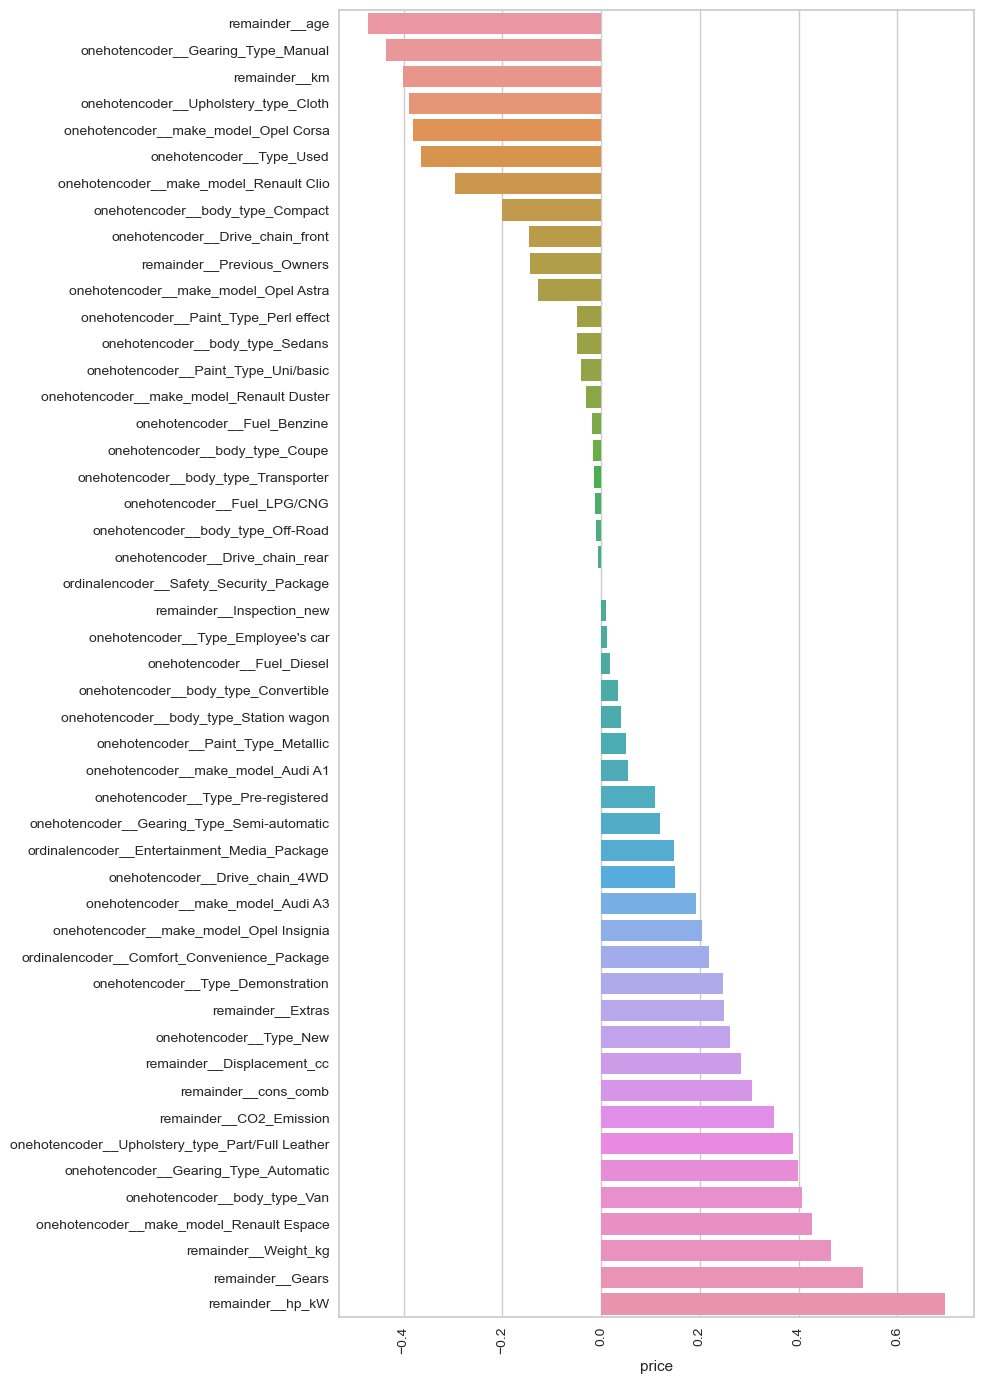

In [310]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_price.index, x = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# featureler ile target arasındaki corr.ları görselleştiriyoruz.

### Scaling

In [311]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [312]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)  ###fit işlemi sadece train setine uygulanır
X_test_scaled = scaler.transform(X_test)

#scaler.fit_transform(X_train) 

# fit işlemi ile tercih ettiğimiz scale algortimasının yukarıda belirtilen dönüşüm formülleri oluşturulur.
# transform ile ilgili bilgiler formüle konularak dönüşüm sağlanır.

# fit işlemi sadece train setine uygulanır ve train setindeki bilgilere istinaden hem train hem de test setine dönüşüm
# uygulanur.

# test setine train setinin bilgileri ile dönüşüm uygulamazsak train ve test setindeki gözlemler farklı değerler
# alacağından predictionlarımız yanlış çıkacaktır.

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [313]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [314]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)



In [315]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train) ## linear modelimizi kurup train datası üzerinde eğitiyoruz.

LinearRegression()

In [316]:
pd.options.display.float_format = '{:.3f}'.format

# df içerisinde yer alan numeric değerleri bu format ile sadeleştirebiliyoruz. "." dan sonra sadece 3 rakamın gösterimesini
# sağlıyoruz.

In [317]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.871
mae,1854.313,1856.250
mse,7224132.672,6870110.043
rmse,2687.775,2621.089


### Adjusted R2 Score

In [318]:
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# datamızda çok fazla featura var fakat yeteri kadar satır yoksa bu durum modelimizin R2_scorunda yalancı bir iyileştirme 
# yapar. Özellikle bu tür datalarda veya datamıza çok fazla yeni feature (dummies feature gibi) ilave olduysa mutlaka 
# adjusted R2_score ile gerçek R2_score tespit etmemiz gerekiyor.

# Adjusted R2_score satır ve feature sayısı arasında ki trade off'u kontrol ederek bize bir skore döndürür. Eğer sayılar 
# arasında büyük bir dengesizlik varsa adjusted_R2_scorunda ciddi düşüşler olacaktır. Adjusted R2 Score için yukardaki
# fonksiyonu tanımlıyoruz.


In [319]:
y_pred = lm.predict(X_test_scaled)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [320]:
adj_r2(y_test, y_pred, X)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.8707756208321641

## Cross Validate

In [321]:
from sklearn.model_selection import cross_validate, cross_val_score

In [322]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
             return_train_score=True)

# daha önceki derslerimizde öğrendiğimiz gibi overfiting kontrolünü cross validaition üzerinden aldığımız. train ve 
# validation scorlarını karşılaştırarak yapıyoruz.

In [323]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.020,0.001,0.862,0.868,-1860.749,-1855.843,-7440029.538,-7211120.909,-2727.642,-2685.353
2,0.023,0.001,0.866,0.868,-1928.866,-1848.488,-7612176.738,-7184366.765,-2759.017,-2680.367
3,0.016,0.002,0.869,0.868,-1903.703,-1855.178,-7155591.965,-7240161.495,-2674.994,-2690.755
4,0.011,0.001,0.857,0.869,-1854.816,-1854.965,-7848795.176,-7156766.951,-2801.570,-2675.213
5,0.013,0.001,0.858,0.869,-1955.124,-1843.741,-8627975.567,-7079691.731,-2937.342,-2660.769
6,0.012,0.001,0.875,0.867,-1799.629,-1865.697,-6813698.863,-7271831.653,-2610.306,-2696.633
7,0.012,0.001,0.872,0.867,-1795.787,-1865.048,-6282318.527,-7335885.911,-2506.455,-2708.484
8,0.014,0.002,0.871,0.867,-1876.694,-1847.844,-7404448.447,-7212781.243,-2721.112,-2685.662
9,0.011,0.001,0.867,0.868,-1823.077,-1863.024,-6952035.912,-7265275.363,-2636.671,-2695.417
10,0.009,0.001,0.866,0.868,-1853.842,-1856.632,-7046434.355,-7261777.597,-2654.512,-2694.769


In [324]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz.Overfiting yoktur.

test_r2                                    0.866
train_r2                                   0.868
test_neg_mean_absolute_error           -1865.229
train_neg_mean_absolute_error          -1855.646
test_neg_mean_squared_error         -7318350.509
train_neg_mean_squared_error        -7221965.962
test_neg_root_mean_squared_error       -2702.962
train_neg_root_mean_squared_error      -2687.342
dtype: float64

In [325]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.871
mae,1854.313,1856.250
mse,7224132.672,6870110.043
rmse,2687.775,2621.089


## Prediction Error

In [344]:
2621/df.price.mean()

# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre modelimiz ortalama %14.5 hata yapıyor.


0.14544754826732098

### Prediction Error with Outliers

In [327]:
#!conda install -c districtdatalabs yellowbrick

In [328]:
#conda install -c districtdatalabs yellowbrick

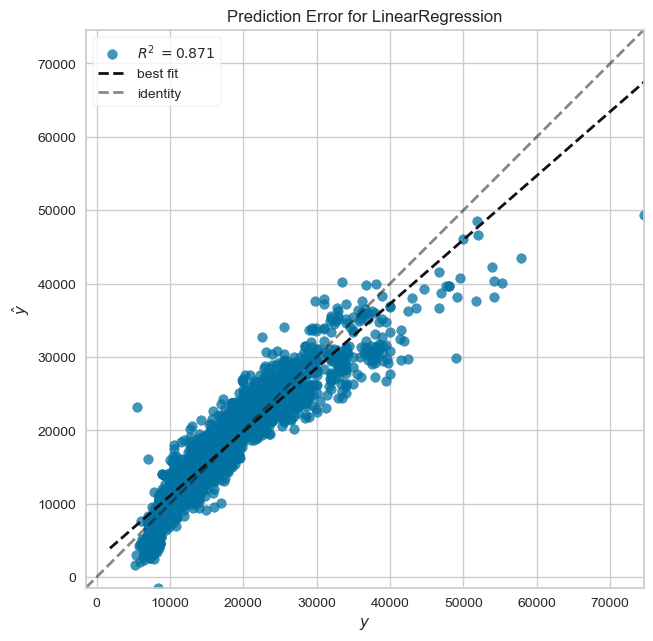

In [329]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# prediciton error görseli ile modelimizin yaptığı tahminlerin ne kadar iyi olup olmadığını görebiliyoruz. Aşağıdaki
# görsele baktığımızda 40 bin EURO ve üzerindeki fiyatlı arabaların best fit linemızı aşağıya doğru çektiğini görebiliyoruz
# Eğer ben datadan scorlarımı bozduğunu gördüğüm 40 bin EURO ve üzerindeki arabaları veya modeller bazında tespit ettiğim
# outlier fiyatlı arabaları datamdan çıkarıp bu data üzerinden yeniden modeli eğittiğimde daha iyi scorlar alabilirim.

# Biz bu notebookumuzda outlier dağerleri datamızdan çıkararak devam edeceğiz. Ancak sizler 40 bin EURO ve üzerindeki
# fiyatlı arabaları da datanızdan çıkarıp scorlarınızı gözlemleyebilirsiniz.

## Residual Plot

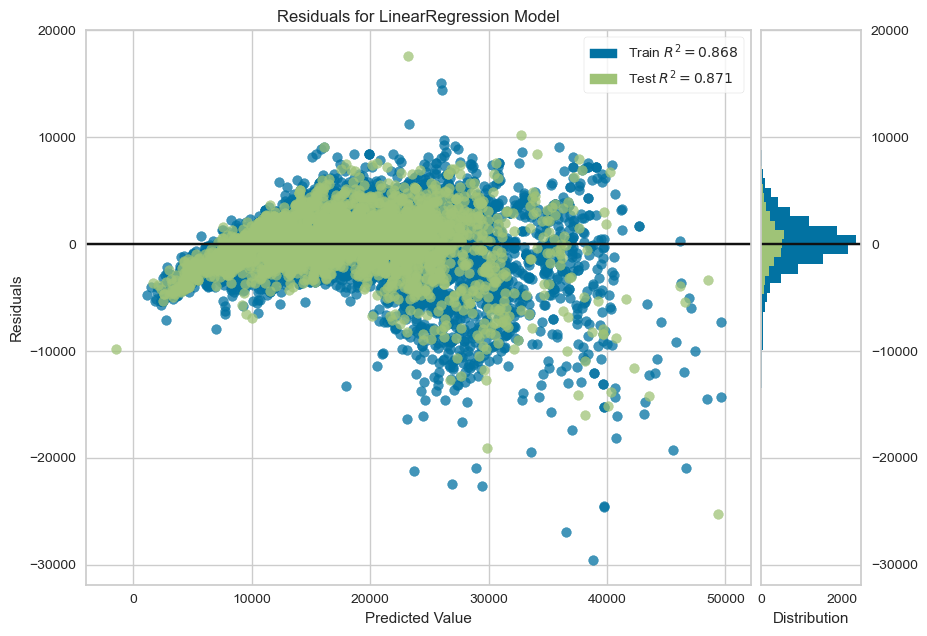

In [330]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();     

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [331]:
for model in df1.make_model.unique():
    
    car_prices = df1[df1["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df1[df1["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df1.drop(index = drop_index, inplace=True)
    df1.reset_index(drop=True, inplace=True)
df1

# Burada  outlier gözlemleri datamızdan çıkarıyoruz. Önce lower ve upper sınrılarını belirleyip bu limitlerin dışında
# kalan araba fiyatlarının indexlerini tespit edip bu indexleri datamızdan drop ediyoruz
# drop ettiğimiz indexleri ignore edip index sıralamasını düzgün yapabilmek için reset_indexi kullanıyoruz.

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,3,7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,4,7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,2,7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,3,6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,4,7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,Van,39950,1647.363,New,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Premium,Plus,Safety Premium Package
15489,Renault Espace,Van,39885,9900.000,Used,Benzine,3,7.000,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400,168.000,Premium,Plus,Safety Premium Package
15490,Renault Espace,Van,39875,15.000,Pre-registered,Diesel,1,6.000,0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300,139.000,Standard,Plus,Safety Premium Package
15491,Renault Espace,Van,39700,10.000,Pre-registered,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Standard,Plus,Safety Premium Package


In [332]:
15493 + 416

15909

In [333]:
df1.shape

(15493, 23)

In [334]:
df2 = df1.copy()

# outlierlardan temizlenmiş datamızı ileride kullanabilmek maksadıyla df3'e atıyoruz.

In [335]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# outlier gözlemleri drop ettikten sonra elimizde kalan datayı yeniden X ve y olarak ayırıp train ve test setlerine bölüyoruz.


In [336]:
X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

In [337]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [338]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

### Prediction Error without Outliers

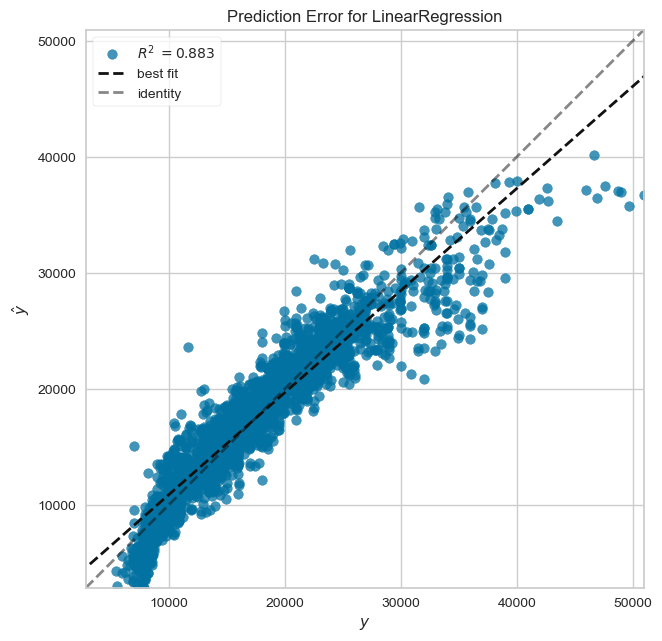

In [339]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# outlier değerleri çıkardıktan sonra best fit line ile identity line arasındaki açının daha da daraldığını görüyoruz.

### Residual Plot without Outliers

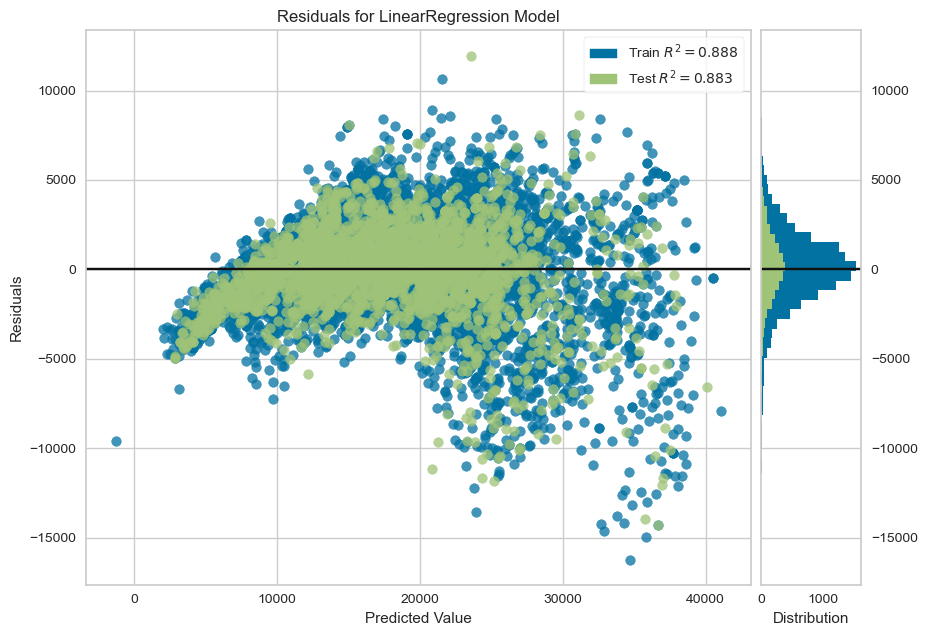

In [340]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [341]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# outlierlar çıktıktan sonra sonuçların daha da iyilşetiğini görebiliyoruz.

,train,test
R2,0.888,0.883
mae,1629.989,1600.408
mse,5170500.386,5102259.553
rmse,2273.873,2258.818


In [347]:
2259/df1.price.mean()

0.12850944509173817

In [ ]:
# outlierları atmadan önceki ortalama tahmin hatamız %14.55'den %12,85'e düştü yaklaşık %2'lik tahminlerimizde iyileşme
# oldu.

In [348]:
model = LinearRegression() # normalize=True
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

# yeni datamıza göre overfiting kontrolü yapıyoruz.

In [349]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.877,0.889,-1661.060,-1628.771,-5296755.639,-5171396.215,-2301.468,-2274.070
2,0.888,0.888,-1637.076,-1626.700,-5383311.827,-5154436.347,-2320.197,-2270.338
3,0.893,0.887,-1609.317,-1632.828,-4863968.631,-5215763.612,-2205.441,-2283.805
4,0.888,0.888,-1581.639,-1635.646,-4871649.692,-5209962.860,-2207.181,-2282.534
5,0.886,0.888,-1650.914,-1625.920,-5401284.416,-5148673.039,-2324.066,-2269.069
6,0.892,0.887,-1656.858,-1623.631,-5348771.110,-5167992.668,-2312.741,-2273.322
7,0.888,0.888,-1581.790,-1634.382,-4936234.612,-5197709.947,-2221.764,-2279.849
8,0.880,0.889,-1728.773,-1616.818,-6060655.080,-5078058.222,-2461.840,-2253.455
9,0.887,0.888,-1617.213,-1630.133,-5079425.116,-5190197.485,-2253.758,-2278.200
10,0.889,0.888,-1625.384,-1629.005,-5059403.299,-5187761.827,-2249.312,-2277.666


In [350]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# train ve validation skorları yakın olduğundan overfiting problemi yok diyebiliriz.

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1635.002
train_neg_mean_absolute_error          -1628.384
test_neg_mean_squared_error         -5230145.942
train_neg_mean_squared_error        -5172195.222
test_neg_root_mean_squared_error       -2285.777
train_neg_root_mean_squared_error      -2274.231
dtype: float64

In [351]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# müşteriye sunacağımzı test skorları ile CV'dan aldığımız validation skorları biribirine yakın olduğundan test (hold out)
# setinden aldığımız skorların tutarlı skorlar olduğunu söyleyebiliriz.

,train,test
R2,0.888,0.883
mae,1629.989,1600.408
mse,5170500.386,5102259.553
rmse,2273.873,2258.818


In [352]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# linear modelden aldığımız skorları karşılaştırmak için skorları değişkenlere atıyoruz.

In [353]:
lm2.coef_  # onehot encoder uygulanmış featureların katsayıları çok yüksek. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

array([ 4.63108863e+15,  4.63108863e+15,  4.63108863e+15,  4.63108863e+15,
        4.63108863e+15,  4.63108863e+15,  4.63108863e+15,  4.63108863e+15,
       -7.54956685e+15, -7.54956685e+15, -7.54956685e+15, -7.54956685e+15,
       -7.54956685e+15, -7.54956685e+15, -7.54956685e+15, -7.54956685e+15,
        3.37714117e+15,  3.37714117e+15,  3.37714117e+15,  3.37714117e+15,
        3.37714117e+15,  9.06554169e+15,  9.06554169e+15,  9.06554169e+15,
       -2.02380471e+16, -2.02380471e+16, -2.02380471e+16, -9.27853321e+15,
       -9.27853321e+15,  9.52180034e+15,  9.52180034e+15,  9.52180034e+15,
       -9.99235615e+15, -9.99235615e+15, -9.99235615e+15,  1.14356250e+03,
       -1.11500000e+02,  2.57187500e+02, -1.08190000e+04,  5.93875000e+02,
        1.85425000e+03, -5.23000000e+03,  4.25875000e+02,  1.57421250e+04,
       -3.90000000e+01, -8.91000000e+02, -1.42550000e+03,  6.28750000e+02,
       -2.74000000e+03])

In [354]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])


,Coef
onehotencoder__make_model_Audi A1,4631088631144003.000
onehotencoder__make_model_Audi A3,4631088631145347.000
onehotencoder__make_model_Opel Astra,4631088631140146.000
onehotencoder__make_model_Opel Corsa,4631088631138536.000
onehotencoder__make_model_Opel Insignia,4631088631143604.000
onehotencoder__make_model_Renault Clio,4631088631138580.000
onehotencoder__make_model_Renault Duster,4631088631134526.000
onehotencoder__make_model_Renault Espace,4631088631149448.000
onehotencoder__body_type_Compact,-7549566853707258.000
onehotencoder__body_type_Convertible,-7549566853709880.000


## Pipeline

In [356]:
df1.head() # without outliers

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,3,7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,4,7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,2,7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,3,6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,4,7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package


In [357]:
X = df2.drop(columns = ["price"])
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# outlier gözlemleri drop ettikten sonra elimizde kalan datayı yeniden X ve y olarak ayırıp train ve test setlerine bölüyoruz.



In [358]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
5818,Opel Astra,Station wagon,66535.000,Used,Diesel,2,6.000,2.000,2.000,100.000,1,Metallic,Cloth,Automatic,1598.000,1550.000,front,4.500,119.000,Premium,Plus,Safety Premium Package
12640,Opel Insignia,Sedans,8650.000,Used,Benzine,2,6.000,0.000,1.000,121.000,0,Metallic,Part/Full Leather,Manual,1490.000,1503.000,front,6.000,136.000,Premium,Plus,Safety Premium Package
4447,Audi A3,Sedans,3000.000,Used,Benzine,1,7.000,1.000,1.000,85.000,0,Uni/basic,Cloth,Automatic,999.000,1275.000,front,5.100,117.000,Standard,Plus,Safety Premium Package
6061,Opel Astra,Station wagon,89738.000,Used,Benzine,4,6.000,3.000,2.000,103.000,0,Metallic,Cloth,Manual,1364.000,1425.000,front,5.600,133.000,Standard,Standard,Safety Premium Package
9991,Opel Corsa,Sedans,50.000,Pre-registered,Benzine,3,5.000,0.000,1.000,51.000,0,Metallic,Cloth,Manual,1229.000,1163.000,front,5.300,124.000,Standard,Plus,Safety Premium Package


What happens can be described as follows:

The data are split into TRAINING data and TEST data according to ratio of train_test_split

fit process:
Step 1: the onehotencoder is fitted on the categoric features in cat_onehot list for TRAINING data
Step 2: the onehotencoder transforms the categoric features in cat_onehot list for TRAINING data
step 3: the ordinalencoder is fitted on the categoric features in cat_ordinal list for TRAINING data
Step 4: the ordinalencoder transforms the categoric features in cat_ordinal list for TRAINING data
step 5: the numeric features of TRAINING data are left as they are
Step 6: the minmaxscaler is fitted on all features of transformed TRAINING data
Step 7: the minmaxscaler transforms all features of transformed TRAINING data
Step 8: the models are fitted/trained using the scaled and transformed TRAINING data

predict process:
Step 1: the onehotencoder transforms the categoric features in cat_onehot list of TEST data according to TRAINING data
Step 2: the ordinalencoder transforms the categoric features in cat_ordinal list of TEST data according to TRAINING data
step 3: the numeric features of TRAINING data are left as they are
Step 4: the minmaxscaler transforms all features of TEST data according to TRAINING data
Step 5: the trained models predict using the scaled and transformed TEST data


pipe_model.fit(X_train, y_train) --> columns_trans.fit_transform(X_train) --> Lasso.fit(X_train_trans, y_train)
pipe_model.predict(X_test)       --> columns_trans.transform(X_test)      --> Lasso.predict(X_test_trans)

Pipeline burda açıklandığı gibi işlemlerimizi otomotize eder.

In [359]:

cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']


In [360]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()

# make_column_transformer fonksiyonu featurlara yapılacak dönüşümleri otomotize eder. Bu fonksiyonun içerisine vereceğimiz
# sırlamaya göre featurlara sıra ile dönüşüm uygular.

# (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) kodu ne yapar?
# handle_unknown = "ignore" parametresi ile test setinde geçip train setinde geçmeyen kategorik verilerin tümü
# 0'a dönüştürecek şekilde cat_onehot listesinde bulunan bütün featurlara onehotencoder dönüşümü yapar.

# (OrdinalEncoder(categories=categories), cat_ordinal) kodu ne yapar?
# ilgili featurlara onehotencoder dönüşümü yapıldıktan sonra cat_ordinal listesinde bulunan bütün featurlara categories
# listesi içerisindeki unique kategorik gözlemlerin hiyerarşik sıralamasına göre ordinal encoder dönüşümü yapar.

# remainder='passthrough' ile dönüşüm yapılmayan diğer tüm featurları olduğu gibi bırak anlamına gelir.
# eğer remainder defaul değeri ile "drop" olarak bırakılırsa dönüşüm yapılmayan tüm featurlar df'den drop edilir.
# remainder= MinMaxScaler() veya StandardScale() yaparsak dönüşüm yapılmayan featurlar haricindeki diğer featurlara
# scale işlem uygulanır.

In [361]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

# pipe_model.fit(X,y) burda sırasıyla ne işlem yapar?
# pipe_model içerisindeki ilk yapılacak işlem column_trans olduğundan;
# 1. X datasındaki onehotencoder dönüşümü uygulanacak featurlara (cat_onehot) onehotencoder dönüşümü yapılır.
# 2. X datasındaki ordinalencoder dönüşümü uygulanacak featurlara (cat_ordinal) ordinalencoder dönüşümü yapılır.
# 3. Dönüşüm yapılmış featurlar haricinde kalan featurlara hiçbir işlem yapılmaz olduğu gibi bırakılır.
# pipe_model içerisindeki ikinci yapılacak işlem MinMaxScaler() olduğundan;
# 4. Dönüşüm sonrası elde etiiğimiz yeni numeric X'e minmax scale uygulanır. Datamızda 0 ve 1'lerden oluşan dummies featurlar 
# olduğundan bu gözlemler yine 0 ve 1 olarak kalsın diye minmaxscale uygulandı.
# pipe_model içerisindeki üçüncü yapılacak işlem Lasso() olduğundan;
# 5. Dönüştürülmüş ve scallenmiş X ile birlikte y Lasso modele verilerek eğitim tamamlanır.


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

In [362]:
from sklearn.linear_model import Ridge

In [363]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [364]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1627.573,1597.596
mse,5169904.474,5092455.314
rmse,2273.742,2256.647


## Cross Validation

In [365]:

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)


In [366]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1633.824
train_neg_mean_absolute_error          -1627.370
test_neg_mean_squared_error         -5219722.126
train_neg_mean_squared_error        -5167461.404
test_neg_root_mean_squared_error       -2283.511
train_neg_root_mean_squared_error      -2273.190
dtype: float64

## Finding best alpha for Ridge

In [367]:
from sklearn.model_selection import GridSearchCV

In [368]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [369]:

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)


In [370]:
pipe_model.get_params()  #pipeline ile tanımlanmış modelin parametrelerini görmek için

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'Type', 'Fuel',
                                     'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Standard',
                                                                'Premium',
                                                                'Premium Plus'],
                                                               ['Standard',
                                                                'Plus'],
                                                   

In [371]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [372]:
ridge_grid_model.best_estimator_

# hyper parametrelerden default haricinde bulunan değerleri döndürür sadece eğer gridsearch sonrası en iyi alpha 
# değermiz 1 olsaydı  burda 1 değerini göstermeyecekti.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [373]:
ridge_grid_model.best_params_

{'Ridge__alpha': 1.02}

In [409]:
pd.DataFrame(ridge_grid_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.289,0.615,0.018,0.009,0.010,{'Ridge__alpha': 0.01},-2299.489,-2318.104,-2202.087,-2207.578,-2321.512,-2304.660,-2222.846,-2461.230,-2251.460,-2248.536,-2283.750,72.975,2,-2272.024,-2268.926,-2281.697,-2281.324,-2268.703,-2270.596,-2279.796,-2252.257,-2276.399,-2276.669,-2272.839,8.294
1,0.063,0.006,0.013,0.004,1.020,{'Ridge__alpha': 1.02},-2299.453,-2316.788,-2204.025,-2204.735,-2320.077,-2305.979,-2219.896,-2460.184,-2251.787,-2252.227,-2283.515,72.782,1,-2272.408,-2269.195,-2282.051,-2281.727,-2269.088,-2270.949,-2280.189,-2252.628,-2276.784,-2277.011,-2273.203,8.301
2,0.065,0.008,0.010,0.003,2.030,{'Ridge__alpha': 2.03},-2300.669,-2316.067,-2206.203,-2203.358,-2319.514,-2307.456,-2218.228,-2459.678,-2253.037,-2255.843,-2284.005,72.535,3,-2273.323,-2269.832,-2282.911,-2282.683,-2270.018,-2271.800,-2281.119,-2253.537,-2277.711,-2277.841,-2274.078,8.314
3,0.061,0.007,0.012,0.005,3.040,{'Ridge__alpha': 3.04},-2302.598,-2315.743,-2208.512,-2202.850,-2319.521,-2308.997,-2217.331,-2459.577,-2254.870,-2259.353,-2284.935,72.279,4,-2274.568,-2270.700,-2284.101,-2283.982,-2271.297,-2272.976,-2282.377,-2254.802,-2278.987,-2278.991,-2275.278,8.327
4,0.061,0.008,0.009,0.005,4.050,{'Ridge__alpha': 4.05},-2304.955,-2315.711,-2210.892,-2202.910,-2319.935,-2310.574,-2216.951,-2459.790,-2257.089,-2262.754,-2286.156,72.034,5,-2276.034,-2271.727,-2285.515,-2285.508,-2272.813,-2274.378,-2283.854,-2256.311,-2280.500,-2280.361,-2276.700,8.341


In [375]:
ridge_grid_model.best_index_

1

In [376]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2283.515
mean_train_score   -2273.203
Name: 1, dtype: object

In [377]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1627.568,1597.590
mse,5169954.570,5092452.496
rmse,2273.753,2256.646


In [378]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [379]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge(alpha=1.02))]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [380]:

ridge_model["Ridge"].coef_  
#Katsayıları alabilmek için pipeline ile oluşturulmuş model üzerinden tanımaldığınız model adının key olarak kullanılması gerekir.


array([  2258.68981631,   3532.37889545,  -1679.43171017,  -3358.40977769,
         1748.8593196 ,  -3254.71794025,  -6815.54238103,   7568.17377776,
          209.00769787,  -1889.74201645,   -403.23661354,    383.48555278,
          368.94657827,    530.53720104,   -903.63038181,   1704.6319819 ,
         1969.98483762,  -1142.19212064,    536.64138332,   -451.56305587,
         -912.87104438,   -420.7858531 ,    186.66579724,    234.12005586,
         -794.52733128,   1425.47669628,   -630.949365  ,   -306.45203111,
          306.45203111,     35.52732067,  -1697.53783937,   1662.01051877,
         1957.65003326,   -379.94515941,  -1577.70487385,   1145.93983609,
         -104.94912815,    258.25669405, -10603.88949056,    607.29849227,
         1860.95217183,  -5275.98489387,    449.43562798,  15207.69639265,
          -48.1713672 ,   -659.02474211,  -1319.01683927,    567.00240084,
        -2484.05410129])

In [381]:
ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['onehotencoder__make_model_Audi A1',
       'onehotencoder__make_model_Audi A3',
       'onehotencoder__make_model_Opel Astra',
       'onehotencoder__make_model_Opel Corsa',
       'onehotencoder__make_model_Opel Insignia',
       'onehotencoder__make_model_Renault Clio',
       'onehotencoder__make_model_Renault Duster',
       'onehotencoder__make_model_Renault Espace',
       'onehotencoder__body_type_Compact',
       'onehotencoder__body_type_Convertible',
       'onehotencoder__body_type_Coupe',
       'onehotencoder__body_type_Off-Road',
       'onehotencoder__body_type_Sedans',
       'onehotencoder__body_type_Station wagon',
       'onehotencoder__body_type_Transporter',
       'onehotencoder__body_type_Van',
       'onehotencoder__Type_Demonstration',
       "onehotencoder__Type_Employee's car", 'onehotencoder__Type_New',
       'onehotencoder__Type_Pre-registered', 'onehotencoder__Type_Used',
       'onehotencoder__Fuel_Benzine', 'onehotencoder__Fuel_Diesel',
       '

In [407]:

b=pd.DataFrame(ridge_model["Ridge"].coef_, index = ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")
b

,Coef
remainder__km,-10603.889
onehotencoder__make_model_Renault Duster,-6815.542
remainder__age,-5275.985
onehotencoder__make_model_Opel Corsa,-3358.410
onehotencoder__make_model_Renault Clio,-3254.718
remainder__CO2_Emission,-2484.054
onehotencoder__body_type_Convertible,-1889.742
onehotencoder__Gearing_Type_Manual,-1697.538
onehotencoder__make_model_Opel Astra,-1679.432
onehotencoder__Drive_chain_rear,-1577.705


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [383]:
from sklearn.linear_model import Lasso

In [384]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [385]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.119,1596.424
mse,5177208.946,5085246.452
rmse,2275.348,2255.049


## Cross Validation

In [386]:

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)


In [387]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1634.322
train_neg_mean_absolute_error          -1628.847
test_neg_mean_squared_error         -5216126.030
train_neg_mean_squared_error        -5174321.986
test_neg_root_mean_squared_error       -2282.698
train_neg_root_mean_squared_error      -2274.698
dtype: float64

## Finding best alpha for Lasso

In [388]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)


In [389]:
lasso_grid_model.fit(X_train, y_train)

/Users/ruveydekaygisiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+09, tolerance: 5.146e+07
  model = cd_fast.enet_coordinate_descent(
/Users/ruveydekaygisiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+09, tolerance: 5.190e+07
  model = cd_fast.enet_coordinate_descent(
/Users/ruveydekaygisiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [390]:
lasso_grid_model.best_params_

{'Lasso__alpha': 1.02}

In [391]:
lasso_grid_model.best_index_

1

In [392]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 1, dtype: object

In [393]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.137,1596.409
mse,5177409.984,5085291.420
rmse,2275.392,2255.059


In [394]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [395]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [408]:

a =pd.DataFrame(lasso_model["Lasso"].coef_, index = lasso_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")
a

,Coef
remainder__km,-10580.701
onehotencoder__make_model_Renault Duster,-6821.054
remainder__age,-5263.686
onehotencoder__make_model_Opel Corsa,-3554.909
onehotencoder__make_model_Renault Clio,-3396.189
onehotencoder__make_model_Opel Astra,-1880.020
onehotencoder__Gearing_Type_Manual,-1728.303
remainder__CO2_Emission,-1499.373
remainder__Weight_kg,-1034.395
onehotencoder__body_type_Transporter,-930.121


In [406]:
pd.concat([a,b], axis = 1) #lasso_coef, ridge_coef

,Coef,Coef
remainder__km,-10580.701,-10603.889
onehotencoder__make_model_Renault Duster,-6821.054,-6815.542
remainder__age,-5263.686,-5275.985
onehotencoder__make_model_Opel Corsa,-3554.909,-3358.410
onehotencoder__make_model_Renault Clio,-3396.189,-3254.718
onehotencoder__make_model_Opel Astra,-1880.020,-1679.432
onehotencoder__Gearing_Type_Manual,-1728.303,-1697.538
remainder__CO2_Emission,-1499.373,-2484.054
remainder__Weight_kg,-1034.395,-1319.017
onehotencoder__body_type_Transporter,-930.121,-903.630


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [410]:
from sklearn.linear_model import ElasticNet

In [411]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [412]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.508,0.505
mae,3671.788,3559.718
mse,22739690.270,21651490.137
rmse,4768.615,4653.116


## Cross Validation

In [413]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [414]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.508
train_r2                                    0.509
test_neg_mean_absolute_error            -3671.517
train_neg_mean_absolute_error           -3669.248
test_neg_mean_squared_error         -22737008.635
train_neg_mean_squared_error        -22704157.757
test_neg_root_mean_squared_error        -4766.857
train_neg_root_mean_squared_error       -4764.876
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [415]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [416]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
                                                                                                     'Premium '
                                                                                                     'Plus '
                                                                                                     'Package']]),
                                                                         ['Comfort_Convenience_Package',
                                                                          'Entertainment_Media_Package',
                                                                          'Safety_Security_Package'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [417]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 1.02, 'ElasticNet__l1_ratio': 1}

In [422]:
elastic_grid_model.best_index_

5

In [423]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 5, dtype: object

In [424]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.137,1596.409
mse,5177409.984,5085291.420
rmse,2275.392,2255.059


In [425]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

In [426]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [431]:

df_feat_imp = pd.DataFrame(model["Lasso"].coef_, index = model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")



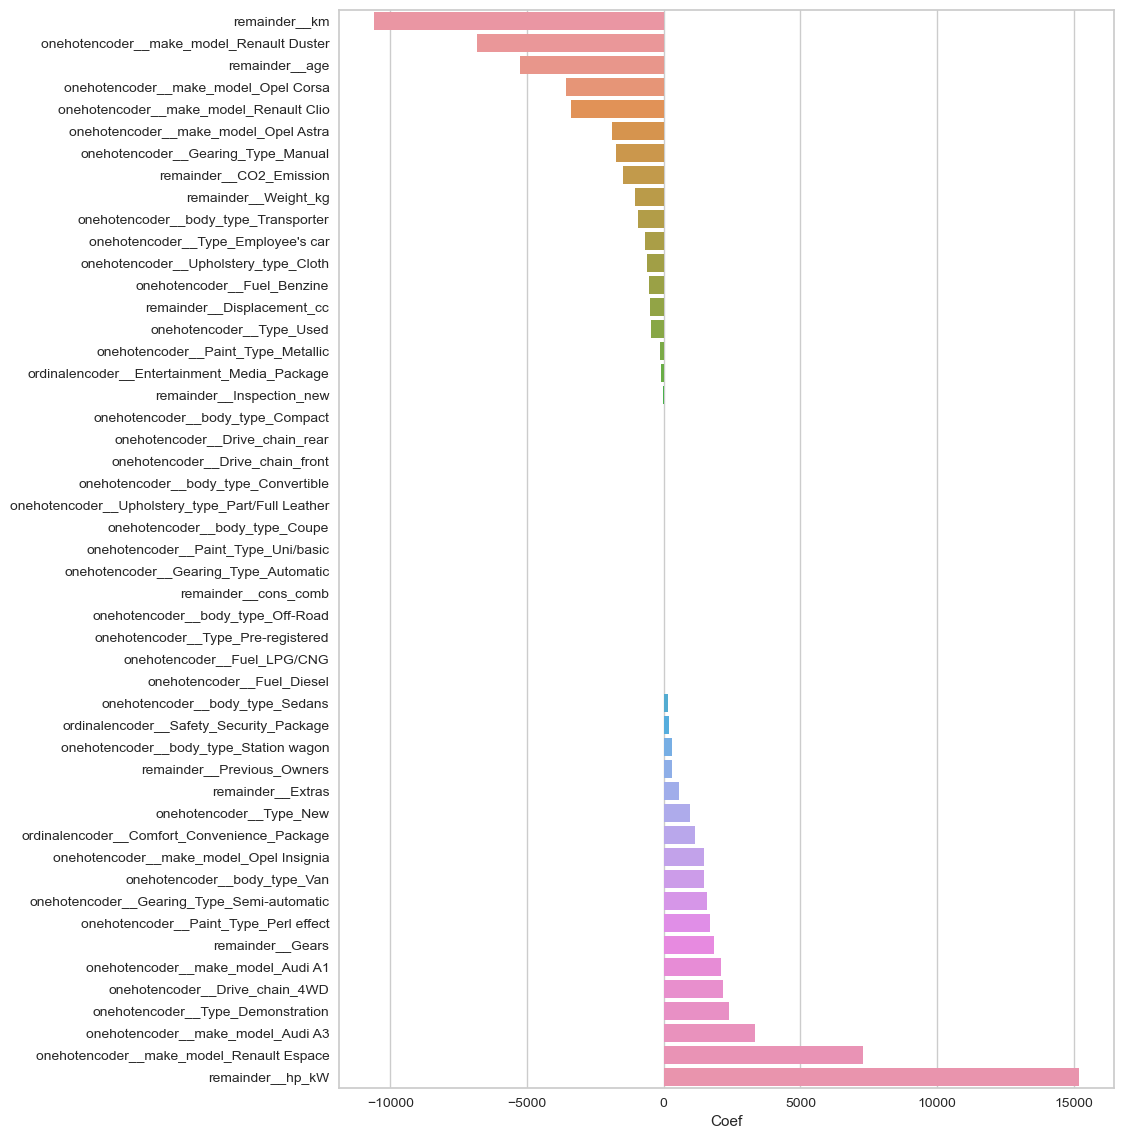

In [432]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

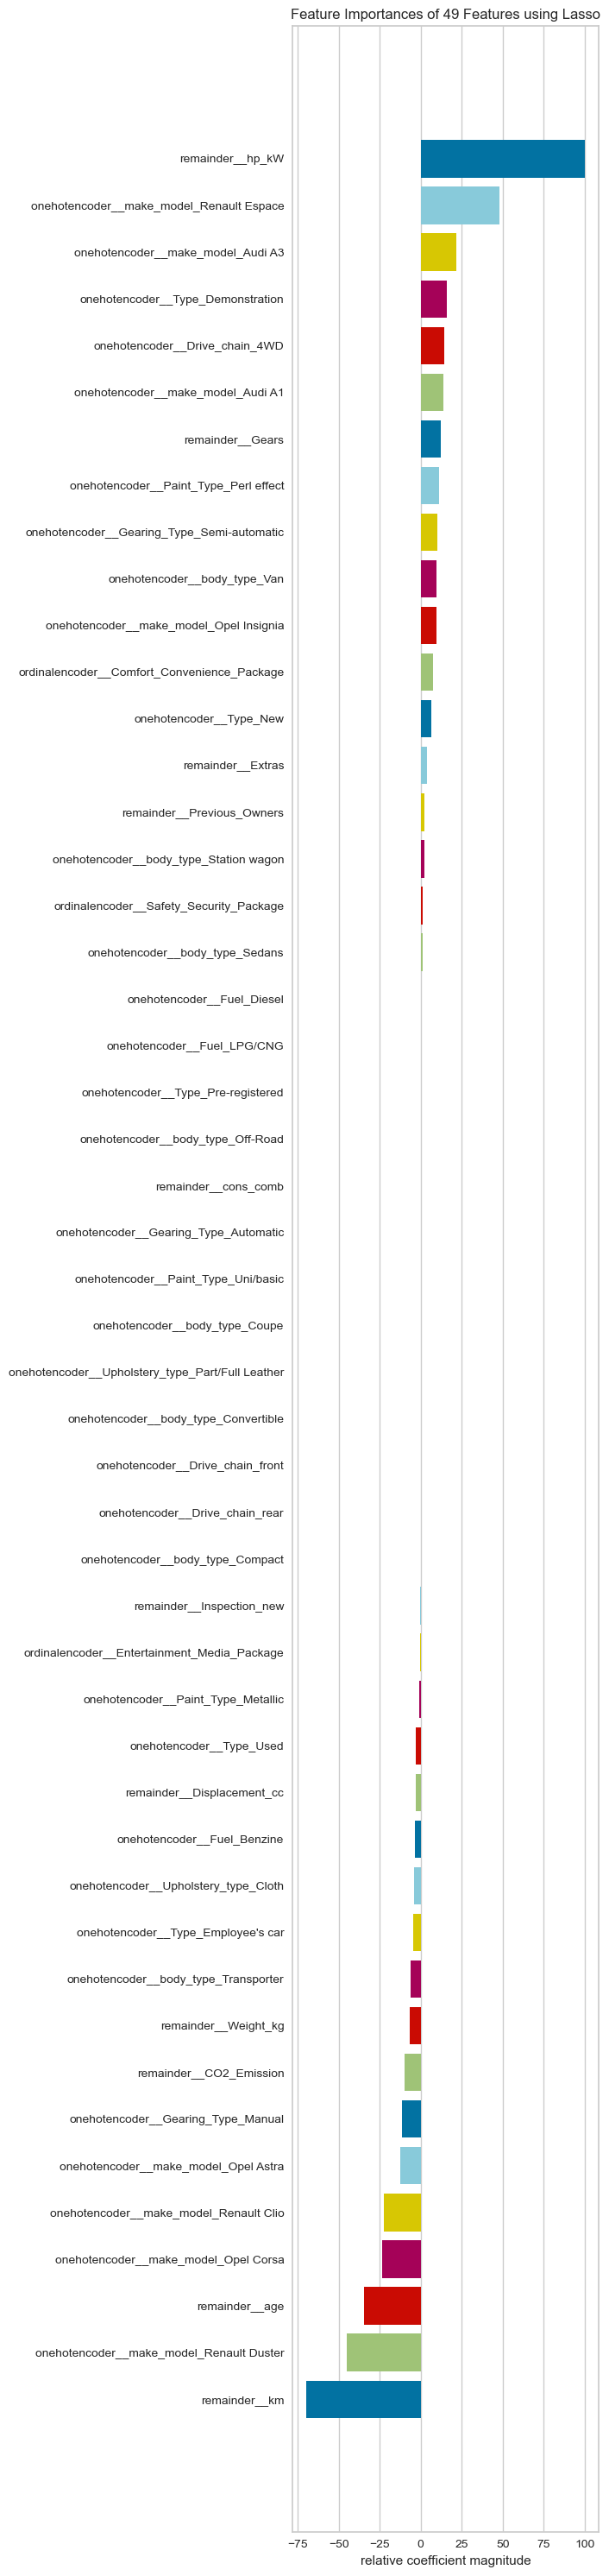

In [433]:
# pipeline kullanıldığında yellowbrick ile feature importance bakılamıyor.

from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

X_train_trans= column_trans.fit_transform(X_train)
X_train_scaled= scaler.fit_transform(X_train_trans)
model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=column_trans.get_feature_names_out())
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# feature selection yapacağımızdan lasso modeli kullanmamız gerektiğini unutmuyoruz.

In [435]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "Gears", "Type", 'Safety_Security_Package', "price"]]

# tahminlemeye en fazla etkisi olan ilk 7 feature seçiyoruz. Burda make_model feature neden seçildi şeklinde bir soru 
# gelebilir. Yukardaki görsel incelendiğinde tahminlemeye en fazla etkisi olan featurlar arasında make_model featurenın
# unique kategorik gözlemlerini(Audi A3, AudiA1, Renault Espace vb) olduğunu gördüğümüzden make_model featuranı da seçtik.

# 'Safety_Security_Package' featuranın tahminlemeye çok katkısı olmamasına rağmen aşağıda ordinalencoder dönüşümlerini 
# otomatize edeceğimiz kodlarla nasıl kullandığımızı göstermek için seçilmiştir.

In [436]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package,price
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package,16790
...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,147.000,1647.363,0.000,Automatic,6.000,New,Safety Premium Package,39950
15489,Renault Espace,165.000,9900.000,0.000,Automatic,7.000,Used,Safety Premium Package,39885
15490,Renault Espace,146.000,15.000,0.000,Automatic,6.000,Pre-registered,Safety Premium Package,39875
15491,Renault Espace,147.000,10.000,0.000,Automatic,6.000,Pre-registered,Safety Premium Package,39700


In [437]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# yeni 7 featurlı data setimize göre X ve y mizi belirleyip modeli yeniden kuruyoruz. Ve yukarda yaptığımız işlemleri
# tekrarlıyoruz.

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [439]:
cat_onehot = ['make_model', 'Type', 'Gearing_Type']
cat_ordinal = ['Safety_Security_Package']

Safety_Security_Package = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
    
categories = [Safety_Security_Package]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories=categories), cat_ordinal),
                                       remainder='passthrough') #MinMaxScaler()

In [440]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)

train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.879
mae,1656.817,1619.918
mse,5470129.665,5304445.257
rmse,2338.831,2303.138


## Cross Validate

In [441]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [442]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.881
train_r2                                   0.882
test_neg_mean_absolute_error           -1659.164
train_neg_mean_absolute_error          -1656.716
test_neg_mean_squared_error         -5489269.264
train_neg_mean_squared_error        -5469107.920
test_neg_root_mean_squared_error       -2341.656
train_neg_root_mean_squared_error      -2338.596
dtype: float64

In [443]:
2303/df_new.price.mean()

0.13101250643925322

In [444]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [445]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

# tüm modellerden elde ettiğimiz metricleri jason formatında scores değişkenine atıyoruz. Daha sonra model isimlerinin
# indexte, metriclerin featurlarda görünmesi maksadıyla df'in transposunu alıyoruz.

,r2_score,mae,rmse
linear_m,0.883,1600.408,2258.818
ridge_m,0.884,1597.590,2256.646
lasso_m,0.884,1596.409,2255.059
elastic_m,0.884,1596.409,2255.059
final_m,0.879,1619.918,2303.138


In [446]:
compare = scores.sort_values(by="r2_score", ascending=False)
compare
#sns.barplot(x = compare[j] , y= compare.index)

# compare df'ini r2_scorlarına göre büyükten küçüğe olacak şekilde yeniden sıralandırıyoruz.

,r2_score,mae,rmse
lasso_m,0.884,1596.409,2255.059
elastic_m,0.884,1596.409,2255.059
ridge_m,0.884,1597.590,2256.646
linear_m,0.883,1600.408,2258.818
final_m,0.879,1619.918,2303.138


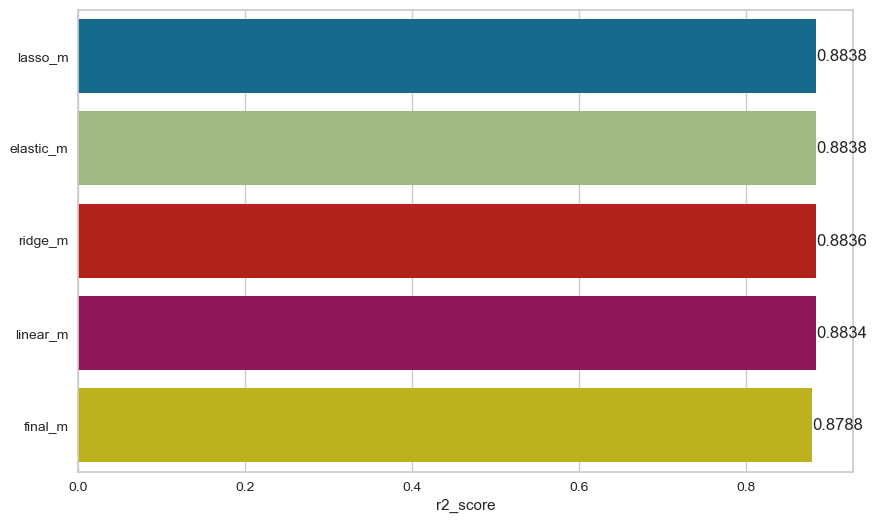

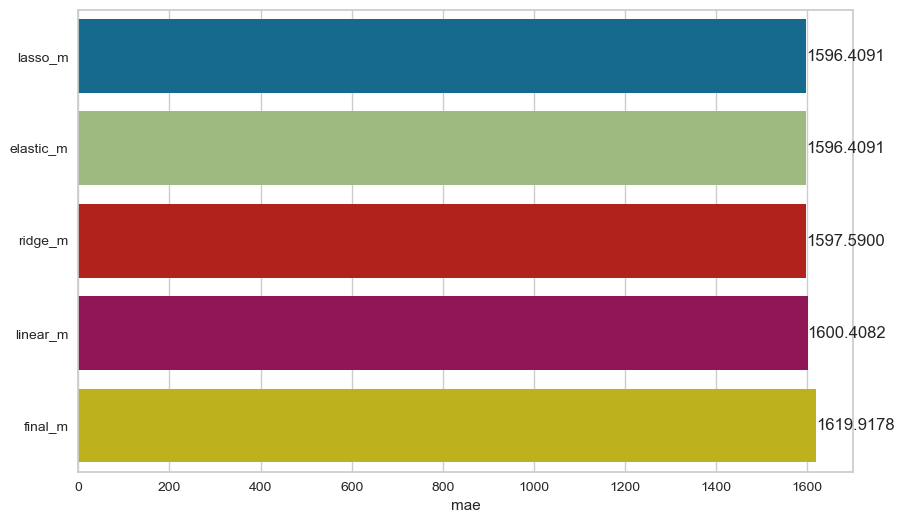

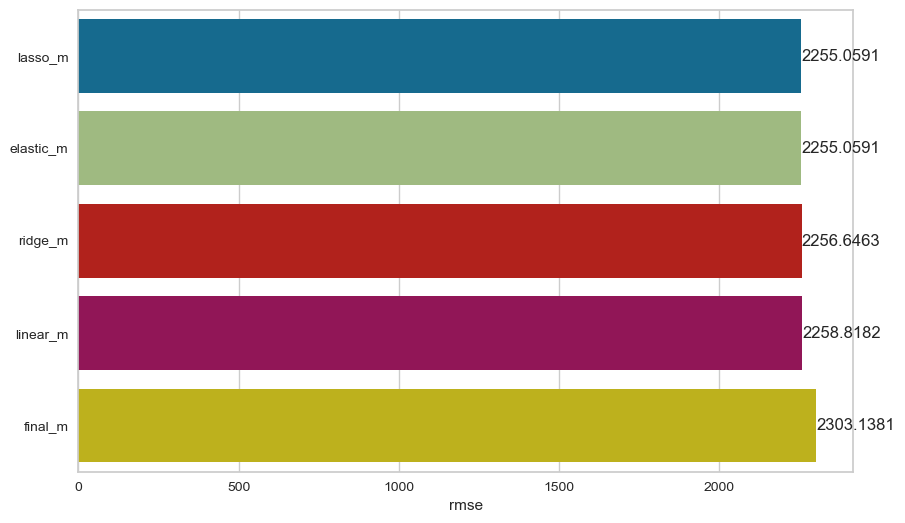

In [447]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # eğer metricimiz r2_score ise barplot büyükten küçüğe sıralanacak
    else:
        ascending = True # eğer metricimiz mae veya rmse ise barplot küçükten büyüğe sıralanacak
    compare = scores.sort_values(by=j, ascending=ascending) # ilgili metrice göre compare df'i yeniden sıralandırılıyor
    ax = sns.barplot(x = compare[j] , y= compare.index) # compare df'den compare[j] ile ilgili metric scorları sıralı
                                                        # bir şekilde çekiliyor ve barplotta görselleştiriliyor.
                                                        # y=compare.index, görselimizin y ekseninde model isimleri yazacak.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate "."dan 4 rakam gelecek şekilde düzenleniyor.
    


## Prediction a new observation
- Create an observation and predict its price

In [459]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# Tüm modelleri deneyip en optimal score aldığımız modele karar verdikten sonra bu model için kullandığımız datayı
# X ve y şeklinde ayırıyoruz. Son aşamada train ve test seti şeklinde ayırım yapmadığımızı unutmayın

In [460]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [461]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)

# yukarda bulduğumuz en iyi hyper parametre ile modeli kuruyoruz.

In [466]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [467]:
my_dict = {
    "make_model": 'Audi A3',
    "hp_kW": 66,
    "km": 17000,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

In [468]:
X.head()

# predict ettireceğimiz gözlemin feature sıralaması eğitim verdiğimiz datanın feature sıralaması aynı olmalı.

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [469]:
new_obs = pd.DataFrame([my_dict])
new_obs


,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,66,17000,2,Automatic,7,Used,Safety Premium Package


In [470]:
final_model.predict(new_obs)

array([19600.25569825])

In [471]:
#pipe_model.predict(new_obs) sırasıyla ne işlem yapar?
# pipe_model içerisindeki ilk yapılacak işlem column_trans olduğundan;
# 1. new_obs datasındaki onehotencoder dönüşümü uygulanacak featurlara (cat_onehot) X datasının bilgilerine göre onehotencoder
# dönüşümü yapılır.
# 2. new_obs datasındaki ordinalencoder dönüşümü uygulanacak featurlara (cat_ordinal) X datasının bilgilerine göre 
# ordinalencoder dönüşümü yapılır.
# 3. new_obs datasının dönüşüm yapılmış featurlar haricinde kalan featurlara hiçbir işlem yapılmaz olduğu gibi bırakılır.
# pipe_model içerisindeki ikinci yapılacak işlem MinMaxScaler() olduğundan;
# 4. Dönüşüm sonrası elde etiiğimiz yeni numeric new_obs'e X datasının min ve max bilgilerine göre minmax scale uygulanır. 
# pipe_model içerisindeki üçüncü yapılacak işlem Lasso() olduğundan;
# 5. X'in bilgilerine göre dönüştürülmüş ve scallenmiş new_obs datası Lasso model tarafından predict edilir.


In [458]:
# Önemli not: make_column_transformer fonksiyonu dönüşüm yaptığı df'de dönüşüm sırasına uygun şekilde kategoric featurları 
# df'in başına numeric featurlarıda df'in sonuna atar.
